**Real Estate Price prediction plays a crucial role in both the real estate market and the economy at large. For investors, developers, and homeowners, accurate price predictions facilitate informed decision-making, investment planning, and risk management.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/patel-mark/Real-Estate-Price-prediction/refs/heads/main/Real_Estate.csv')

In [3]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [5]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


## Exploratory Data Analysis (EDA) 

In [6]:
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [7]:
df[['year','month','day']]=df['Transaction date'].str.split("-",n=2,expand=True)
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,year,month,day
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673,2012,09,02 16:42:30.519336
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725,2012,09,04 22:52:29.919544
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267,2012,09,05 01:10:52.349449
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638,2012,09,05 13:26:01.189083
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710,2012,09,06 08:29:47.910523


In [8]:
df=df.drop(columns=['Transaction date','day'],axis=1)
df.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,year,month
0,13.3,4082.0150,8,25.007059,121.561694,6.488673,2012,09
1,35.5,274.0144,2,25.012148,121.546990,24.970725,2012,09
2,1.1,1978.6710,10,25.003850,121.528336,26.694267,2012,09
3,22.2,1055.0670,5,24.962887,121.482178,38.091638,2012,09
4,8.5,967.4000,6,25.011037,121.479946,21.654710,2012,09


In [9]:
df.groupby('month')['House price of unit area'].mean()

month
01    31.791870
02    31.508866
03    26.661964
04    30.473606
05    30.608928
06    25.758827
07    28.639852
08    37.580554
09    29.721681
10    27.268113
11    30.889162
12    26.777964
Name: House price of unit area, dtype: float64

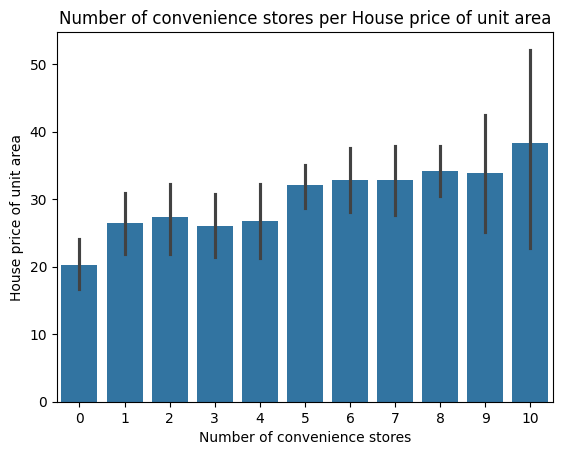

In [10]:
sns.barplot(data=df,
       x='Number of convenience stores',
       y='House price of unit area')
plt.title('Number of convenience stores per House price of unit area')
plt.xlabel('Number of convenience stores')
plt.ylabel('House price of unit area')
plt.show()

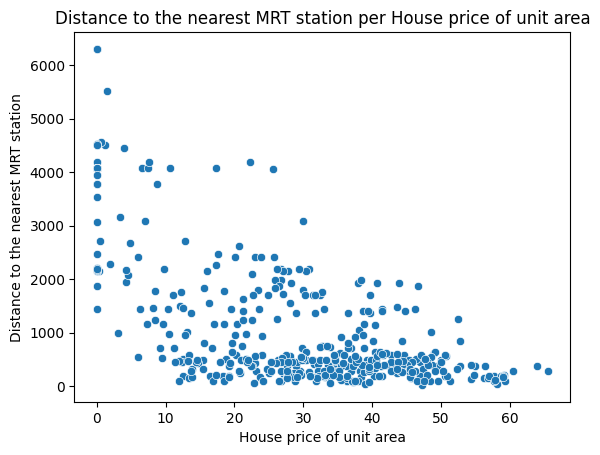

In [11]:
sns.scatterplot(data=df,
       x='House price of unit area',
       y='Distance to the nearest MRT station')
plt.title('Distance to the nearest MRT station per House price of unit area')
plt.xlabel('House price of unit area')
plt.ylabel('Distance to the nearest MRT station')
plt.show()

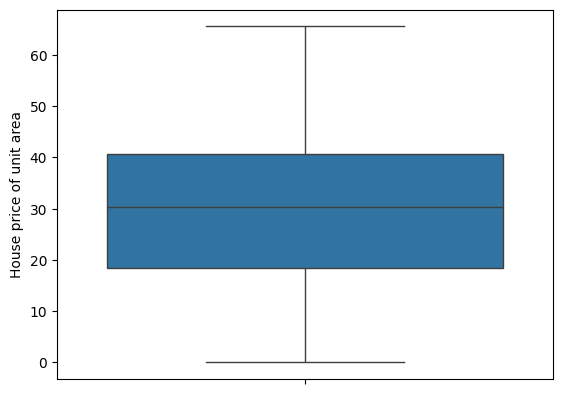

In [12]:
sns.boxplot(data=df,y='House price of unit area')
plt.show()

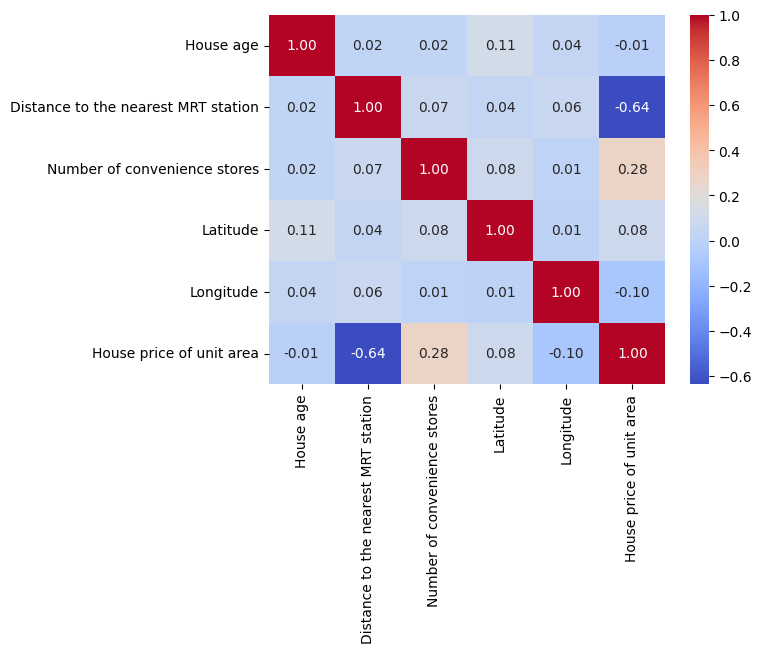

In [13]:
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

## ML MODEL

### Feature Selection